# Media Company Case Study

Problem Statement: A digital media company (similar to Voot, Hotstar, Netflix etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewship. The company wants to figure out what went wrong.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
media = pd.read_csv('mediacompany.csv')

In [3]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [6]:
media.drop('Unnamed: 7', axis=1, inplace=True)

In [7]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [8]:
# Converting date to Pandas datetime format
media['Date'] = pd.to_datetime(media['Date'])

In [9]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [15]:
media.Date

0    2017-03-01
1    2017-03-02
2    2017-03-03
3    2017-03-04
4    2017-03-05
        ...    
75   2017-05-15
76   2017-05-16
77   2017-05-17
78   2017-05-18
79   2017-05-19
Name: Date, Length: 80, dtype: datetime64[ns]

In [20]:
# Deriving "days since the show started"

from datetime import date

d0 = date(2017, 2, 28)
d1 = media['Date'].dt.date
delta = d1 - d0
media['day'] = delta

In [21]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [22]:
# Cleaning days
media['day'] = media['day'].astype(str)
media['day'] = media['day'].map(lambda x: x[0:2])
media['day'] = media['day'].astype(int)

### We are adding a derived column day because we want to see in the graph in which day how much sales have occured

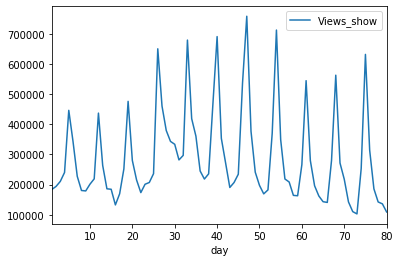

In [32]:
# days vs View show
# spike is happening at the weekend days which is happening in a continous interval
media.plot.line(x = 'day', y = 'Views_show')

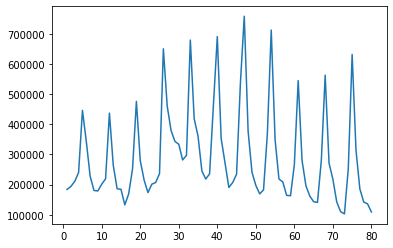

In [33]:
plt.plot(media['day'], media['Views_show'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


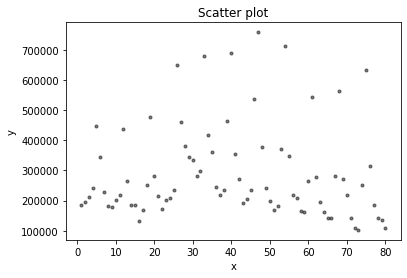

In [36]:
# Scatter Plot (days vs Views_show)
colors = (0, 0, 0)
area = np.pi*3
plt.scatter(media.day, media.Views_show, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

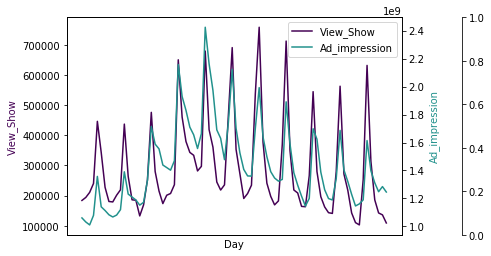

In [39]:
# Plot for days vs views_show and days vs Ad_impressions

fig = plt.figure()
host = fig.add_subplot(111)

part1 = host.twinx()
part2 = host.twinx()

host.set_xlabel('Day')
host.set_ylabel('View_Show')
part1.set_ylabel('Ad_impression')

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)


p1, = host.plot(media.day, media.Views_show, color=color1, label='View_Show')
p2, = part1.plot(media.day, media.Ad_impression, color=color2, label='Ad_impression')

Ins = [p1, p2]
host.legend(handles=Ins, loc='best')

# right, left, top, bottom
part2.spines['right'].set_position(('outward', 60))

# no x-ticks
part2.xaxis.set_ticks([])
# Sometimes handy name for xaxis
# part2.yaxi.set_ticks_position['right']


host.yaxis.label.set_color(p1.get_color())
part1.yaxis.label.set_color(p2.get_color())

plt.savefig('pyplot_multiple_y-axis.png', bbox_inches='tight')

In [40]:
# Derived Metrics
# Weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday
# Generate the weekday variable

media['weekday'] = (media['day']+3) % 7
media.weekday.replace(0, 7, inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


In [41]:
### Running first model (lm1) Weekday & visitors

# Putting feature variable to X
X = media[['Visitors', 'weekday']]

# Putting response variable to y
y = media['Views_show']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [43]:
# Representing LinearRegression as lr (Creating LinearRegression Object)
lm = LinearRegression()

In [44]:
# fit the model to the training data
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
import statsmodels.api as sm
# unlike sklearn, statsmodels don't automatically fit a constant
# so you need to use the method sm.add_constant(X) in order to add a constant.

X = sm.add_constant(X)
# create a fitted model
lm_1 = sm.OLS(y, X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Sun, 29 Sep 2019   Prob (F-statistic):           8.01e-12
Time:                        12:47:23   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

C:\Users\d33ps3curity\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [47]:
# create a weekend variable, with value 1 at weekends and 0 at weekdays
def cond(i):
    if i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else: return 0

media['weekend'] = [cond(i) for i in media['day']]

In [49]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


### Running second model (lm_2) visitors and weekend

In [52]:
# Putting features variable to X
# Putting feature variable to X
X = media[['Visitors', 'weekend']]

# Putting response variable to y
y = media['Views_show']

In [55]:
import statsmodels.api as sm
# unlike sklearn, statsmodels don't automatically fit a constant
# so you need to use the method sm.add_constant(X) in order to add a constant.

X = sm.add_constant(X)
# create a fitted model
lm_2 = sm.OLS(y, X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Sun, 29 Sep 2019   Prob (F-statistic):           2.51e-12
Time:                        12:56:19   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

### Running third model (lm_3) visitors, weekend & Character_A

In [56]:
# Putting feature variable to X
X = media[['Visitors', 'weekend', 'Character_A']]

# Putting response variable to y
y = media['Views_show']

In [57]:
import statsmodels.api as sm

X = sm.add_constant(X)
lm_3 = sm.OLS(y, X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sun, 29 Sep 2019   Prob (F-statistic):           1.53e-14
Time:                        13:01:00   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

C:\Users\d33ps3curity\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Creating another derived column as Lag_Views

In [61]:
media

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061
...,...,...,...,...,...,...,...,...,...,...,...
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,76,2,0,631962
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,77,3,0,313945
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,78,4,0,185689
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,79,5,0,142260


In [59]:
# create Lag_Views variable
media['Lag_Views'] = np.roll(media['Views_show'], 1)
media.Lag_Views.replace(108961, 0, inplace = True)

In [60]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


### Running forth model (lm_4) visitors, Character_A, Lag_Views & weekend

In [62]:
# Putting feature variable to X
X = media[['Visitors', 'Character_A', 'Lag_Views', 'weekend']]

# Putting response variable to y
y = media['Views_show']

In [65]:
import statsmodels.api as sm
X = sm.add_constant(X)
lm_4 = sm.OLS(y, X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Sun, 29 Sep 2019   Prob (F-statistic):           3.16e-21
Time:                        13:15:14   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

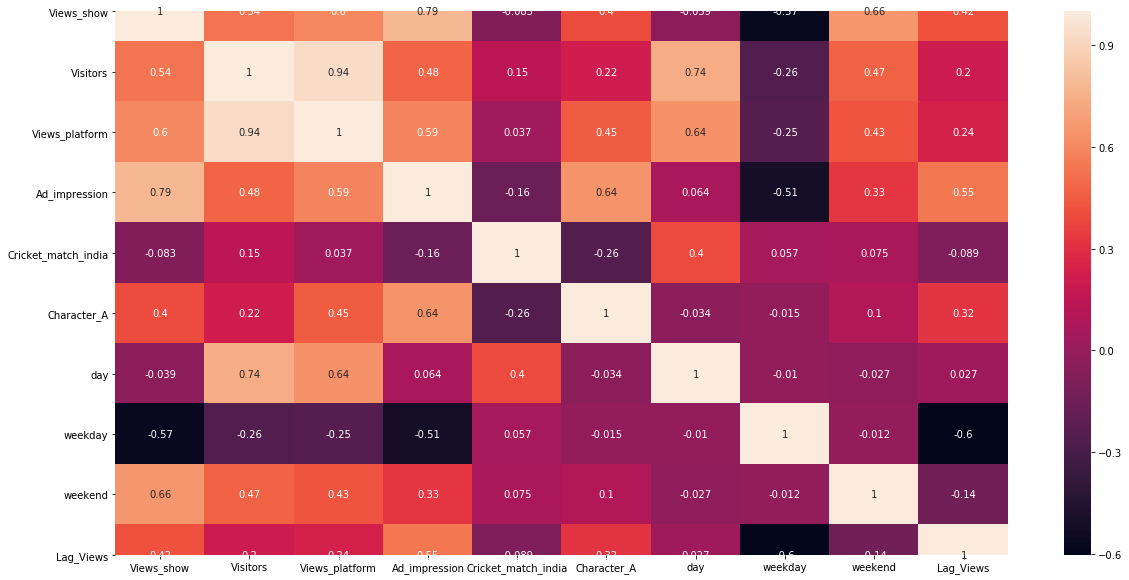

In [67]:
plt.figure(figsize = (20, 10)) # size of the figure
sns.heatmap(media.corr(), annot = True)

### Running fifth model (lm_5) Character_A, Lag_Views, weekend

In [73]:
X = media[['Character_A', 'Views_platform', 'weekend']]

y = media['Views_show']

In [75]:
import statsmodels.api as sm
X = sm.add_constant(X)
lm_5 = sm.OLS(y, X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Sun, 29 Sep 2019   Prob (F-statistic):           3.59e-15
Time:                        13:26:24   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

### Running sixth model (lm_6) Character_A, weekend, Visitors

In [76]:
X = media[['Character_A', 'weekend', 'Visitors']]
y = media['Views_show']

In [78]:
import statsmodels.api as sm
X = sm.add_constant(X)
lm_6 = sm.OLS(y, X).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sun, 29 Sep 2019   Prob (F-statistic):           1.53e-14
Time:                        13:32:39   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

### Running 7th model (lm_7) Character_A, weekend, Visitors, Ad_impression

In [79]:
X = media[['Character_A', 'weekend', 'Visitors', 'Ad_impression']]
y = media['Views_show']

In [81]:
import statsmodels.api as sm

X = sm.add_constant(X)
lm_7 = sm.OLS(y, X).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Sun, 29 Sep 2019   Prob (F-statistic):           1.10e-25
Time:                        13:34:54   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

### Running 8th model (lm_8) character_A, weekend, Ad_impression

In [82]:
X = media[['Character_A', 'weekend', 'Ad_impression']]
y = media['Views_show']

In [83]:
import statsmodels.api as sm
X = sm.add_constant(X)
lm_8 = sm.OLS(y, X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sun, 29 Sep 2019   Prob (F-statistic):           1.05e-26
Time:                        13:39:31   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

C:\Users\d33ps3curity\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [84]:
# Ad_impression in million
media['ad_impression_million'] = media['Ad_impression'] / 1000000

### Running 9th model (lm_9) Character_A, weekend, ad_impression_million & Crciket_match_india

In [85]:
X = media[['Character_A', 'weekend', 'ad_impression_million', 'Cricket_match_india']]
y = media['Views_show']

In [87]:
import statsmodels.api as sm
X = sm.add_constant(X)
lm_9 = sm.OLS(y, X).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Sun, 29 Sep 2019   Prob (F-statistic):           1.02e-25
Time:                        13:48:38   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+

### Running 10th model (lm_10) weekend, Character_A, ad_impression_million

In [88]:
X = media[['weekend', 'Character_A', 'ad_impression_million']]
y = media['Views_show']

In [89]:
import statsmodels.api as sm
X = sm.add_constant(X)
lm_10 = sm.OLS(y, X).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sun, 29 Sep 2019   Prob (F-statistic):           1.05e-26
Time:                        13:51:17   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

C:\Users\d33ps3curity\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Making predictions using lm_10

In [90]:
# Making predictions using the model
X = media[['weekend', 'Character_A', 'ad_impression_million']]
X = sm.add_constant(X)
Predicted_views = lm_10.predict(X)

C:\Users\d33ps3curity\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [91]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)

In [92]:
print('Mean_Squared_Error : ', mse)
print('r_square_value : ', r_squared)

Mean_Squared_Error :  4677651616.2534075
r_square_value :  0.802643446857565


Text(0, 0.5, 'Views')

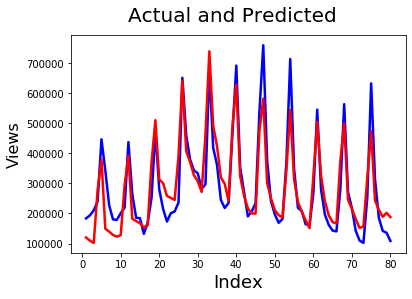

In [93]:
#  Actual vs Predicted
c = [i for i in range(1, 81, 1)]
fig = plt.figure()
plt.plot(c, media.Views_show, color = 'blue', linewidth=2.5, linestyle='-')
plt.plot(c, Predicted_views, color='red', linewidth=2.5, linestyle='-')
fig.suptitle('Actual and Predicted', fontsize=20) # Plot heading
plt.xlabel('Index', fontsize=18) # X-label
plt.ylabel('Views', fontsize=16) # Y-label

Text(0, 0.5, 'Views_show vs Predicted_views')

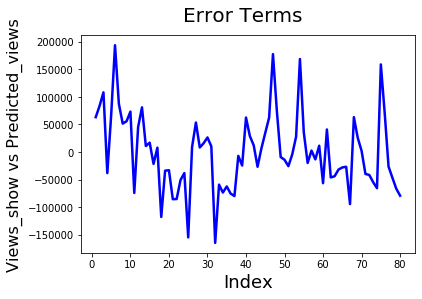

In [94]:
# Error Terms
c = [i for i in range(1, 81, 1)]
fig = plt.figure()
plt.plot(c, media.Views_show - Predicted_views, color = 'blue', linewidth=2.5, linestyle='-')
fig.suptitle('Error Terms', fontsize=20) # Plot heading
plt.xlabel('Index', fontsize=18) # X-label
plt.ylabel('Views_show vs Predicted_views', fontsize=16) # Y-label


### Making predictions using lm_6

In [95]:
X = media[['weekend', 'Character_A', 'Visitors']]
X = sm.add_constant(X)
Predicted_views = lm_6.predict(X)

C:\Users\d33ps3curity\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [96]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)

In [97]:
print('Mean_Squared_Error : ', mse)
print('r_square_value : ', r_squared)

Mean_Squared_Error :  12759422860.866766
r_square_value :  0.4616624061617517


Text(0, 0.5, 'Views')

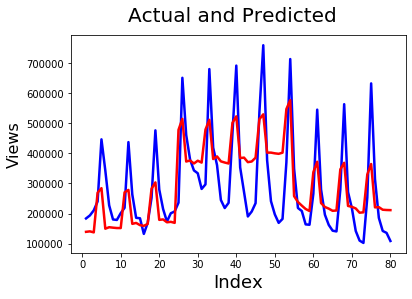

In [98]:
#  Actual vs Predicted
c = [i for i in range(1, 81, 1)]
fig = plt.figure()
plt.plot(c, media.Views_show, color = 'blue', linewidth=2.5, linestyle='-')
plt.plot(c, Predicted_views, color='red', linewidth=2.5, linestyle='-')
fig.suptitle('Actual and Predicted', fontsize=20) # Plot heading
plt.xlabel('Index', fontsize=18) # X-label
plt.ylabel('Views', fontsize=16) # Y-label

Text(0, 0.5, 'Views_show vs Predicted_views')

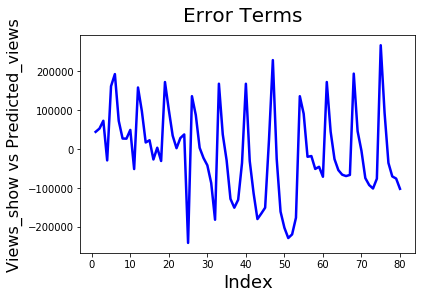

In [99]:
# Error Terms
c = [i for i in range(1, 81, 1)]
fig = plt.figure()
plt.plot(c, media.Views_show - Predicted_views, color = 'blue', linewidth=2.5, linestyle='-')
fig.suptitle('Error Terms', fontsize=20) # Plot heading
plt.xlabel('Index', fontsize=18) # X-label
plt.ylabel('Views_show vs Predicted_views', fontsize=16) # Y-label
